In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler




Missing values in dataset:
Relative_Compactness    0
Surface_Area            0
Wall_Area               0
Roof_Area               0
Overall_Height          0
Orientation             0
Glazing_Area            0
Glazing_Distribution    0
Heating_Load            0
Cooling_Load            0
dtype: int64

Correlation Matrix:
                       Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness          1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                 -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                    -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                    -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                   4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                 -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing_Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating_Load

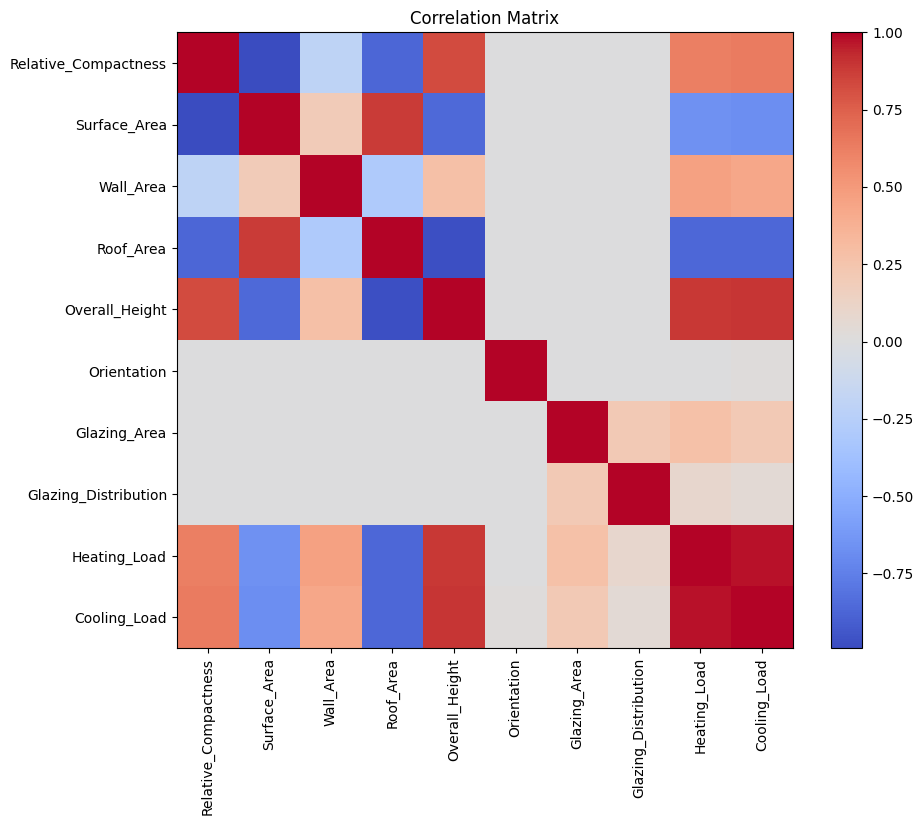

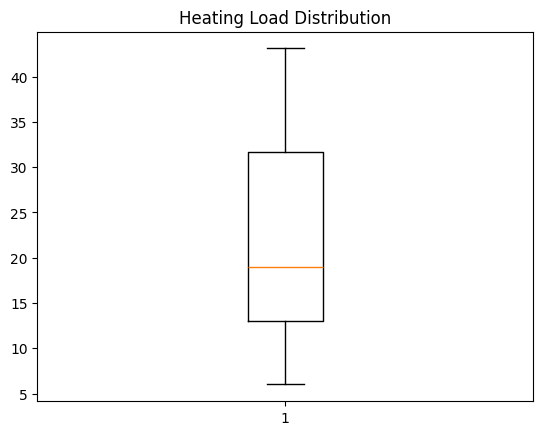

In [6]:
#Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# Rename columns for easier handling
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution',
                'Heating_Load', 'Cooling_Load']


# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())


correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


plt.boxplot(data['Heating_Load'])
plt.title("Heating Load Distribution")
plt.show()

#  Splitting the dataset into training and testing sets (80:20 ratio)
X = data.drop(['Heating_Load', 'Cooling_Load'], axis=1)  # Features
y = data['Heating_Load']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardize the features (important for models like Ridge and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train models
#  Train a multivariate linear regression model from scratch (using numpy)
# Add a column of ones to X_train_scaled and X_test_scaled for the intercept term
X_train_with_intercept = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_with_intercept = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Calculate weights using the Normal Equation: (X.T * X)^(-1) * X.T * y
weights_manual = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

# Predict using the manual model
y_pred_manual = X_test_with_intercept @ weights_manual

#  Train a Linear Regression model using sklearn
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test_scaled)

# 5.3: Train a Ridge Regression model using sklearn
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

#  Train a Lasso Regression model using sklearn
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

#  Evaluate models
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse


In [7]:
# Evaluate the manual model
r2_manual, mse_manual, rmse_manual = evaluate_model(y_test, y_pred_manual)

# Evaluate the sklearn model
r2_sklearn, mse_sklearn, rmse_sklearn = evaluate_model(y_test, y_pred_sklearn)

# Evaluate the ridge model
r2_ridge, mse_ridge, rmse_ridge = evaluate_model(y_test, y_pred_ridge)

# Evaluate the lasso model
r2_lasso, mse_lasso, rmse_lasso = evaluate_model(y_test, y_pred_lasso)



In [8]:
# Print the evaluation metrics
print(f"Manual Model: R2={r2_manual}, MSE={mse_manual}, RMSE={rmse_manual}")
print(f"Sklearn Linear Regression: R2={r2_sklearn}, MSE={mse_sklearn}, RMSE={rmse_sklearn}")
print(f"Ridge Regression: R2={r2_ridge}, MSE={mse_ridge}, RMSE={rmse_ridge}")
print(f"Lasso Regression: R2={r2_lasso}, MSE={mse_lasso}, RMSE={rmse_lasso}")

#  Plot Predicted vs Actual values
plt.figure(figsize=(12, 6))



Manual Model: R2=0.9015264438783603, MSE=10.264136005108492, RMSE=3.2037690311738287
Sklearn Linear Regression: R2=0.9109507173127591, MSE=9.281821279310323, RMSE=3.0466081597918566
Ridge Regression: R2=0.9116028949393404, MSE=9.213843234012044, RMSE=3.035431309387851
Lasso Regression: R2=0.9046481421309064, MSE=9.938753875194733, RMSE=3.1525789244989144


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Predicted Heating Load')

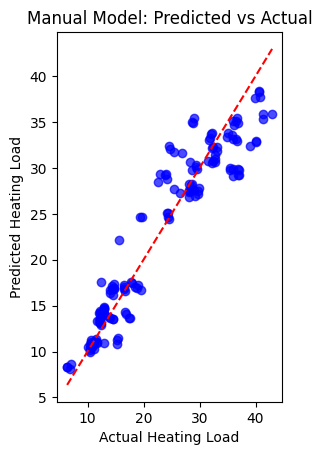

In [9]:
# Manual Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='blue', alpha=0.7, label='Manual Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Manual Model: Predicted vs Actual')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')



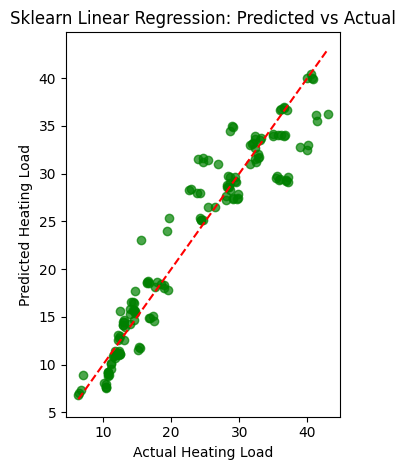

In [10]:
# Sklearn Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.7, label='Sklearn LR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Sklearn Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

plt.tight_layout()
plt.show()



In [11]:
# Suggestions for energy efficiency:
print("\nEnergy Efficiency Improvement Suggestions:")
print("1. Increase wall insulation or reduce the wall area to minimize heat loss during winter.")
print("2. Optimize roof insulation to reduce heat transfer from the outside, especially in colder climates.")
print("3. Reduce glazing area or use energy-efficient glazing materials to decrease the heat loss during heating periods.")



Energy Efficiency Improvement Suggestions:
1. Increase wall insulation or reduce the wall area to minimize heat loss during winter.
2. Optimize roof insulation to reduce heat transfer from the outside, especially in colder climates.
3. Reduce glazing area or use energy-efficient glazing materials to decrease the heat loss during heating periods.
